In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')


In [2]:
df =pd.read_csv('/home/fergg/portfolio/TensorFlow_FILES/DATA/german_credit_data.csv')

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [4]:
df.isnull().sum()/df.shape[0] *100

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

In [5]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

<Axes: xlabel='Age', ylabel='Count'>

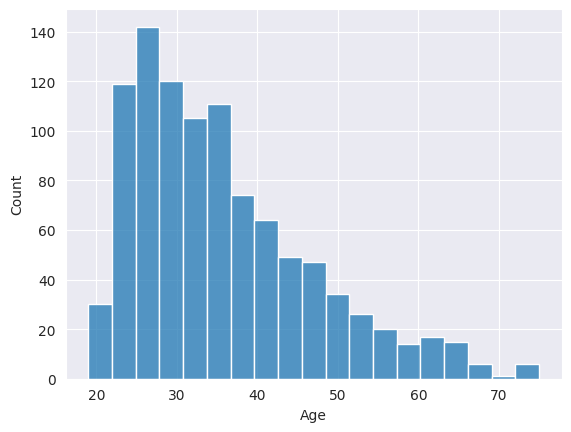

In [6]:
sns.histplot(x=df['Age'])

In [7]:
df['Checking account']

0        little
1      moderate
2           NaN
3        little
4        little
         ...   
995         NaN
996      little
997         NaN
998      little
999    moderate
Name: Checking account, Length: 1000, dtype: object

In [8]:
#df2 = df[pd.isna(df['Checking account']) | pd.isna(df['Saving accounts'])]

In [9]:
df['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [10]:
df['Saving accounts'].fillna('little', inplace=True)

In [11]:
df['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [12]:
df["Checking account"].fillna(df["Checking account"].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [14]:
jobs=pd.get_dummies(df['Job'], dtype=int, drop_first=True, prefix='numofjob')

In [15]:
dum=pd.get_dummies(df[['Sex', 'Housing', 'Purpose']], dtype=int, drop_first=True)

In [16]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [17]:
df=pd.concat([df, jobs,dum], axis=1)

In [18]:
df= df.drop(['Sex', 'Job', 'Housing', 'Purpose'], axis=1)

In [22]:
accounts=pd.get_dummies(df[['Saving accounts', 'Checking account']], dtype=int, drop_first=True)

In [24]:
df = pd.concat([df, accounts])
df=df.drop(['Saving accounts', 'Checking account'], axis=1)

In [21]:
df=df.drop(['Saving accounts', 'Checking account'], axis=1)

In [23]:
df_norm = (df-df.min())/(df.max()-df.min())

In [24]:
df_norm

,Age,Credit amount,Duration,numofjob_1,numofjob_2,numofjob_3,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.857143,0.050567,0.029412,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.053571,0.313690,0.647059,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.535714,0.101574,0.117647,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.464286,0.419941,0.558824,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.607143,0.254209,0.294118,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.214286,0.081765,0.117647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,0.375000,0.198470,0.382353,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.339286,0.030483,0.117647,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.071429,0.087763,0.602941,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=2, max_iter=300)
kmeans.fit(df_norm)

/home/fergg/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [27]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)
pca_credit = pca.fit_transform(df_norm)

In [33]:
df['Kmeans_cluster'] = kmeans.labels_

In [30]:
pca_credit_df = pd.DataFrame(data=pca_credit, columns= ['componente 1', 'componente 2'])

In [47]:
df_final=pd.concat([pca_credit_df, df[['Kmeans_cluster']]], axis=1)

<Axes: xlabel='componente 1', ylabel='componente 2'>

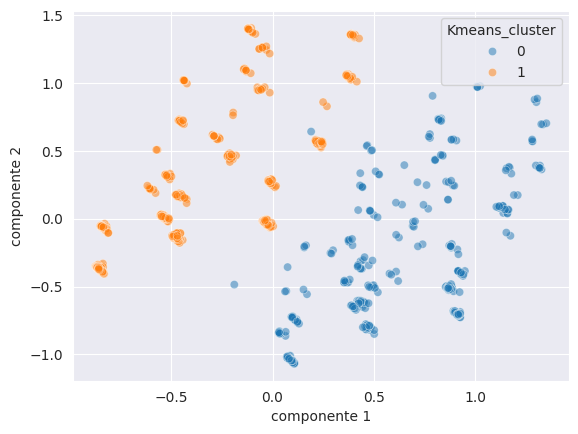

In [49]:
sns.scatterplot(x=df_final['componente 1'], y= df_final['componente 2'], hue=df_final['Kmeans_cluster'],alpha=0.5)